In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Our data is all the scientific publications in the field of Physics which were publishe at year 1976 which includes 122256 papers, and the number of citations that each paper got after its publication, recorded for 34 years 



In [3]:
df = pd.read_csv("Citation_Physics_All_1976.csv",index_col='# Paper')
df.shape

(122256, 35)

#### Ensemble average of the citations for all the publications decreased in time.

<AxesSubplot:>

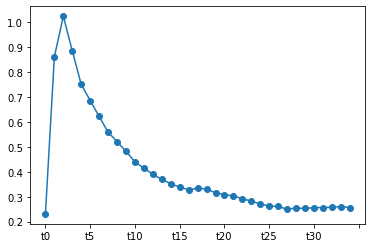

In [4]:
Citations = df.to_numpy()
EA = df.mean(axis=0)
EA.plot(marker='o')

In [5]:
df['total_citations'] = df.sum(axis=1)
dfH = df[df['total_citations']>600]  # Find highly cited oublications with citations more than 600
dfH.shape

(68, 36)

<AxesSubplot:>

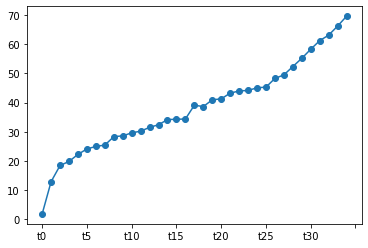

In [6]:
Citations_High = dfH.drop('total_citations',axis=1).to_numpy() 
EAH = dfH.drop('total_citations',axis=1).mean(axis=0)
EAH.plot(marker='o')

#### Above figure shows ensemble average of highly cited papers shows different trend than all the publications.  Highly cited papers get more attention in time

## Mean Square Displacement and Joseph exponent

In [7]:
N = Citations.shape[0]
T = Citations.shape[1]
M = int(T/3)

TMSD=np.zeros((N,M))
j=0

Citation_cumsum = np.cumsum(Citations,axis=1)

for Delta in range(1,M+1):
    for i in range(N):
        MSD=np.mean((Citation_cumsum[i][Delta:]-Citation_cumsum[i][:-Delta])**2)
        TMSD[i][j]=MSD
        
    j+=1

# ensemble everage of time averaged MSD
EATMSD=TMSD.mean(axis=0)
    

Text(0.5, 1.0, 'Physics publications - 1976')

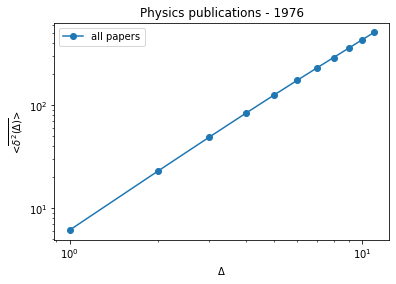

In [8]:
Delta=np.arange(1,M+1)
plt.loglog(Delta,EATMSD,marker='o',label='all papers')
plt.xlabel('$\Delta$')
plt.ylabel('<$\overline{\delta^{2}(\Delta)}$>')
plt.legend()
plt.title('Physics publications - 1976')

In [9]:
slope_msd, intercept_msd = np.polyfit(np.log(Delta),np.log(EATMSD), 1)
slope_msd, intercept_msd

(1.8365216108569218, 1.8474388599877234)

the above slopes equals $2J$. Therefore, $J=0.91 > 0.5$, representing a high degree of correlation between the number of citations the papers get in subsequent years. This was to be expected, since if a papers is popular and gets high number of citations after its publication, it keeps growing due to its high exposure, while less popular papers, with low number of citations in the first years, will often stay in the same state in the years that follow.

## Nonstationarity and Moses exponent

Text(0, 0.5, '$<Y(t)>$')

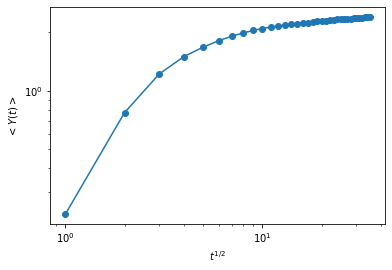

In [10]:
Citation_cumsum = np.cumsum(Citations,axis=1)
Mean_cumsum = Citation_cumsum.mean(axis=0)/(np.arange(T)+1)**0.5
plt.loglog(np.arange(T)+1,Mean_cumsum,marker='o')
plt.xlabel('$t^{1/2}$')
plt.ylabel('$<Y(t)>$')

The figure shows that in the first few years the mean of $Y(t)$ does not grow like a power-law, as indicated by the non-linear scaling of the log-log plot, but from around $t=10$, the growth is power-law.

Text(0.5, 1.0, 'all the physics publications 1976')

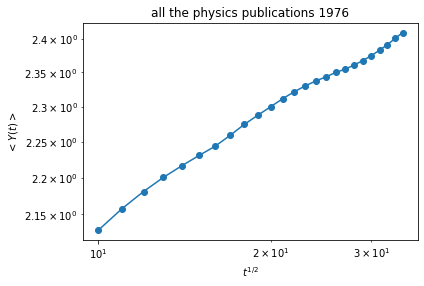

In [12]:
plt.loglog(np.arange(T)[10:],Mean_cumsum[10:],marker='o')
plt.xlabel('$t^{1/2}$')
plt.ylabel('$<Y(t)>$')
plt.title('all the physics publications 1976')

In [13]:
slope, intercept = np.polyfit(np.log(np.arange(T)[10:]),np.log(Mean_cumsum[10:]), 1)
slope, intercept


(0.09596392247268687, 0.5417152835759066)

We know $\langle Y(t)\rangle \sim t^{M+\frac{1}{2}}$, I plotted $\langle Y(t)\rangle$ versus $t^{1/2}$, so the above slope equals the Moses exponent $M=0.095$. Since $M<1/2$, this shows that citation time-series die out in time.
Let's repeat this for the highly cited papers.

Text(0, 0.5, '$<Y(t)>$')

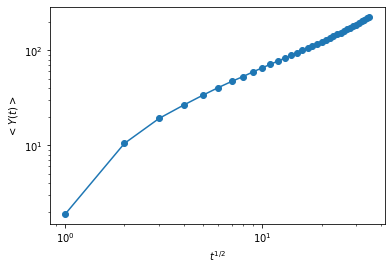

In [14]:
CitationHigh_cum = np.cumsum(Citations_High,axis=1)
MeanHigh_cum = CitationHigh_cum.mean(axis=0)/(np.arange(T)+1)**0.5
plt.loglog(np.arange(T)+1,MeanHigh_cum,marker='o')
plt.xlabel('$t^{1/2}$')
plt.ylabel('$<Y(t)>$')

For highly cited papers, behaviour is different. We can see here the scaling behaviour starts from year 2 after publication.

Text(0.5, 1.0, 'Highly cited publications 1976')

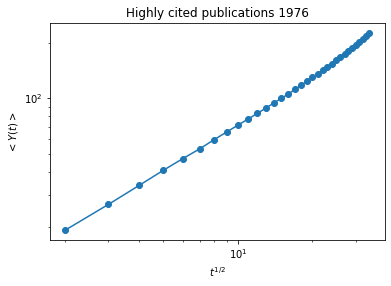

In [15]:
plt.loglog(np.arange(T)[2:],MeanHigh_cum[2:],marker='o')
plt.xlabel('$t^{1/2}$')
plt.ylabel('$<Y(t)>$')
plt.title('Highly cited publications 1976')

In [16]:
slope, intercept = np.polyfit(np.log(np.arange(T)[2:]),np.log(MeanHigh_cum[2:]), 1)
slope, intercept

(0.8644631280746454, 2.2976471120267594)

The slope $M=0.86>1/2$ for the highly cited publications. That means that the yearly citations of the most popular papers increase over time and this indicates that their popularity increases. However, the statistics of highly cited papers have a very small effect on the measured Moses exponent of the whole ensemble, since they are few in number.

## Noah exponent

In [18]:
Citations_squared=np.square(Citations)
Zt = np.cumsum(Citations_squared,axis=1)
Zt_EA = np.mean(Zt,axis=0)

Text(0, 0.5, '$<Z(t)>$')

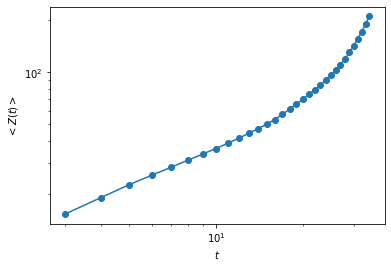

In [19]:
plt.loglog(np.arange(T)[3:],Zt_EA[3:],marker='o')
plt.xlabel('$t$')
plt.ylabel('$<Z(t)>$')

We know $\langle Z(t)\rangle \sim t^{2L+2M-1}$, but $\langle Z(t)\rangle $ doesn't scale linearly in all the time period of study, we can fit a linear line for a part of above figure which behaves linearly and find the slope only for that region and make it equal to $2L+2M+1$, $M$ is known from previouse figure.